<a href="https://colab.research.google.com/github/Zafeeruddin/AIML_LABS/blob/main/lab5_module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generating synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y_actual = 2 * X.squeeze() + np.random.randn(100)  # Actual relationship: y = 2*X + noise

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y_actual)
y_pred = model.predict(X)

# Evaluating using different loss functions
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 0.8065845639670535
RMSE: 0.8981005311027566
MAE: 0.7010426719637758


In [2]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss).mean()

# Evaluating using Huber loss
huber = huber_loss(y_actual, y_pred)
print(f"Huber Loss: {huber}")


Huber Loss: 0.3549035943899688


In [3]:
def quantile_loss(y_true, y_pred, quantile=0.5):
    residual = y_true - y_pred
    return np.maximum(quantile * residual, (quantile - 1) * residual).mean()

# Example usage
quantile_90 = quantile_loss(y_actual, y_pred, quantile=0.9)
print(f"Quantile Loss (90th percentile): {quantile_90}")


Quantile Loss (90th percentile): 0.35052133598188784


In [4]:
def log_cosh_loss(y_true, y_pred):
    error = y_true - y_pred
    return np.log(np.cosh(error)).mean()

# Example usage
log_cosh = log_cosh_loss(y_actual, y_pred)
print(f"Log-Cosh Loss: {log_cosh}")


Log-Cosh Loss: 0.31241225619034174


In [5]:
def tukey_biweight_loss(y_true, y_pred, c=4.685):
    residual = y_true - y_pred
    scale = c * np.median(np.abs(residual))  # Using the median absolute deviation
    return np.where(np.abs(residual) <= scale,
                    (c ** 2 / 6) * (1 - ((1 - (residual / scale) ** 2) ** 3)),
                    (c ** 2 / 6))

# Example usage
tukey_biweight = tukey_biweight_loss(y_actual, y_pred)
print(f"Tukey's Biweight Loss: {np.mean(tukey_biweight)}")



Tukey's Biweight Loss: 0.9536300772793601


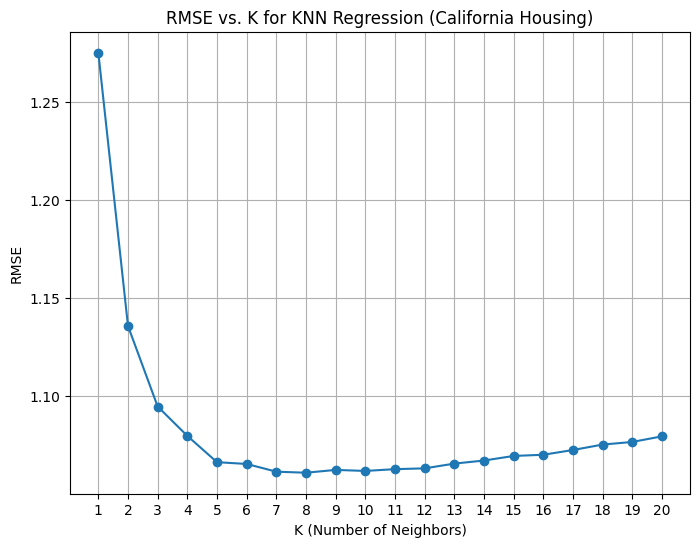

The optimal value of k that gives the lowest RMSE: 8


In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to perform KNN regression with different 'k' values
def knn_regression(k, X_train, y_train, X_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Try different 'k' values and store their RMSE values
k_values = list(range(1, 21))
rmse_values = []

for k in k_values:
    y_pred = knn_regression(k, X_train, y_train, X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    rmse_values.append(rmse)

# Plot the RMSE values for different 'k' values
plt.figure(figsize=(8, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.title('RMSE vs. K for KNN Regression (California Housing)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('RMSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal 'k' value that gives the lowest RMSE
optimal_k = k_values[np.argmin(rmse_values)]
print(f"The optimal value of k that gives the lowest RMSE: {optimal_k}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


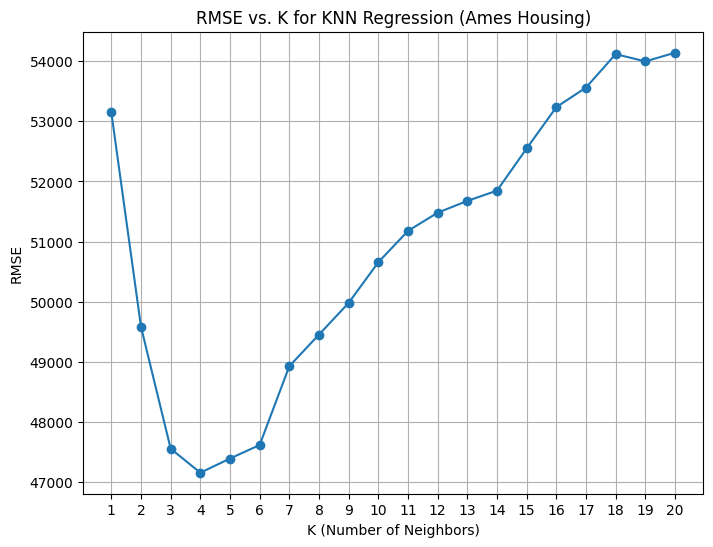

The optimal value of k that gives the lowest RMSE: 4


In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Ames housing dataset
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.frame

# Check for missing values in the dataset
print(data.isnull().sum())

# Handling missing values for numeric columns using SimpleImputer
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

# Handling missing values for categorical columns using SimpleImputer with a constant value
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
imputer_categorical = SimpleImputer(strategy='constant', fill_value='Unknown')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

# Separating features and target variable
target_column = 'SalePrice'  # Replace with your target column name
X = data.drop(columns=[target_column])
y = data[target_column]

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_columns])
columns_encoded = encoder.get_feature_names_out(input_features=categorical_columns)
X_encoded = pd.DataFrame(X_encoded, columns=columns_encoded)
X.drop(columns=categorical_columns, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

# Convert column names to strings
X.columns = X.columns.astype(str)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to perform KNN regression with different 'k' values
def knn_regression(k, X_train, y_train, X_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Try different 'k' values and store their RMSE values
k_values = list(range(1, 21))
rmse_values = []

for k in k_values:
    y_pred = knn_regression(k, X_train, y_train, X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    rmse_values.append(rmse)

# Plot the RMSE values for different 'k' values
plt.figure(figsize=(8, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.title('RMSE vs. K for KNN Regression (Ames Housing)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('RMSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal 'k' value that gives the lowest RMSE
optimal_k = k_values[np.argmin(rmse_values)]
print(f"The optimal value of k that gives the lowest RMSE: {optimal_k}")
